# Separación de los datos y selección de características

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import pandas as pd

## Separación de los datos

* Percentatge
* Cross validation


## Selección de características


### Métodos de filtrado (*Filter methods*)


Los métodos de selección de características de filtro aplican una medida estadística para asignar una puntuación a cada característica. Las características se clasifican según la puntuación y se seleccionan para guardarlas o eliminarlas del conjunto de datos. Los métodos son a menudo univariados y consideran la característica de forma independiente o con respecto a la variable dependiente.

### Métodos de envoltura (*wrapper methods*)

Los métodos de envoltura consideran la selección de un conjunto de características como un problema de búsqueda, donde se preparan, evalúan y comparan diferentes combinaciones con otras combinaciones. Un modelo predictivo que usamos para evaluar una combinación de características y asignar una puntuación basada en la precisión del modelo.

El proceso de búsqueda puede ser metódico, como una búsqueda de primer orden, puede ser estocástico, como un algoritmo aleatorio de escalada, o puede usar heurística, como pases hacia adelante y hacia atrás para agregar y eliminar características.

### Métodos Embebidos (*Embed Methods*)

Los métodos integrados aprenden qué características contribuyen mejor a la precisión del modelo mientras se crea el modelo. El tipo más común de métodos de selección de funciones integradas son los métodos de regularización.


## Ejemplo *Boston dataset*

In [121]:

# Load the boston dataset
data = datasets.load_boston()

boston = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target

### Selección del subconjunto

In [67]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(df, test_size=0.2, random_state=33)

### Ejemplo de filtrado

Vamos a usar el coeficiente de correlacion de Pearson para analizar las relaciones entre las diferentes características y seleccionaremos aquella que creamos que nos proporciona mayores probabilidades de éxito.


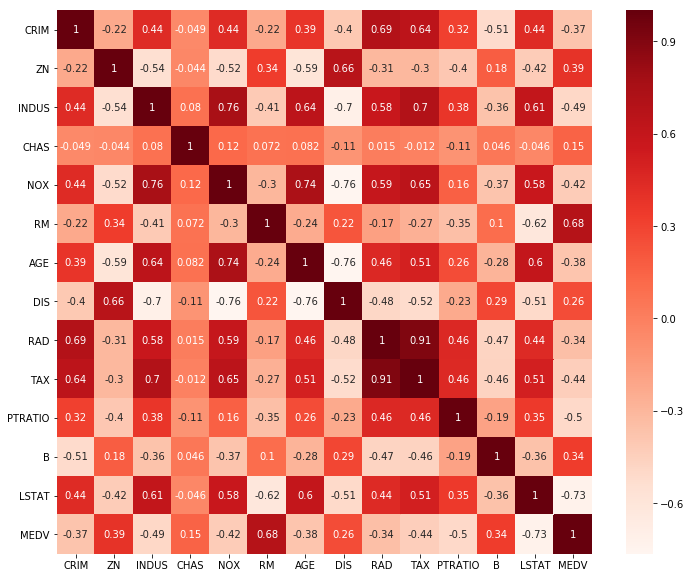

In [120]:
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [84]:
#Correlation with output variable
cor_target = abs(cor["MEDV"]) 
relevant_features = cor_target[cor_target>=0.5]
relevant_features

RM       0.684561
LSTAT    0.727357
MEDV     1.000000
Name: MEDV, dtype: float64

Una de las suposiciones de la regresión lineal es que las variables independientes no deben estar correlacionadas entre sí. 

Si estas variables están correlacionadas entre sí, entonces necesitamos mantener solo una de ellas y dejar el resto


In [88]:
# df_filter = df[relevant_features.index.values]
# plt.figure(figsize=(12,10))
# cor = df_filter.corr()
# sns.heatmap(abs(cor), annot=True, cmap=plt.cm.Reds)
# plt.show()

print(train[["RM","LSTAT"]].corr())

             RM     LSTAT
RM     1.000000 -0.615214
LSTAT -0.615214  1.000000


Coefficients: -0.9455926783463643
Mean squared error: 0.00
Variance score: 0.30


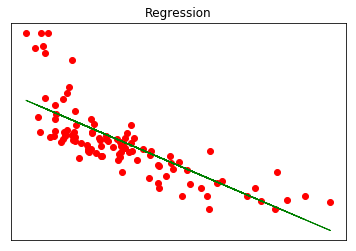

In [119]:
# Create linear regression object
regr = linear_model.LinearRegression()


x_train = train.LSTAT.values.reshape(-1, 1) 
y_train = train.MEDV.values.reshape(-1, 1) 

x_test = test.LSTAT.values.reshape(-1, 1) 
y_test = test.MEDV.values.reshape(-1, 1) 

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients:', str(regr.coef_[0][0]))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(x_test, x_test))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_pred, y_test))

# Plot outputs
plt.scatter(x_test, y_test,  color='red')
plt.plot(x_test, y_pred, color='green', linewidth=1)
plt.title("Regression")

plt.xticks(())
plt.yticks(())

plt.show()

### Ejemplo de envoltura

Vamos a probar el método conocido como [Recursive Feature Selection](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)

Dado un estimador externo que asigna pesos a las características (por ejemplo, los coeficientes de un modelo lineal), el objetivo de la eliminación de características recursivas (RFE) es seleccionar características considerando recursivamente conjuntos de características cada vez más pequeños.


In [135]:
from sklearn.feature_selection import RFE

X = train.drop("MEDV",1)   #Feature Matrix
y = train["MEDV"]          #Target Variable

# Create the RFE object and rank each pixel
r = linear_model.LinearRegression()
rfe = RFE(estimator=r, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_

print(ranking)
print(names[np.argmax(ranking)])




[ 8 10  9  3  1  2 13  5  7 12  4 11  6]
LSTAT


### Usando PCA como selección de características

#### Lecturas adicionales

* [Recursive feature elimination with cross-validation](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py)

* [An Introduction to Feature Selection](https://machinelearningmastery.com/an-introduction-to-feature-selection/)
* [Feature Selection with sklearn and Pandas](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)